# Análisis de Datos FAO de Producción de Berries

FAO : Food and Agriculture Organization of the United Nations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## World Producer Price - annual (mean) in US$/ton

**EN:** Producer Prices are prices received by farmers for primary crops, live animals and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Due to differences in data collection infrastructure and capacity, some countries do vary from this concept by collecting, instead, wholesale or local market prices. While these may be good proxies of farm-gate prices when the marketing chain is very limited, they tend to be poorer proxies in economies where transport and commercial margins constitute a significant share of the final product price. At the far extreme, some countries report retail prices, which are typically very poor proxies for producer prices.

**ES:** Los precios al productor son los precios que reciben los agricultores por los cultivos primarios, los animales vivos y los productos primarios para el ganado recogidos en el punto de venta inicial (precios pagados en la puerta de la granja). Debido a las diferencias en la infraestructura y la capacidad de recopilación de datos, algunos países varían de este concepto al recopilar, en cambio, los precios del mercado mayorista o local. Si bien estos pueden ser buenos indicadores de los precios en la explotación agrícola cuando la cadena de comercialización es muy limitada, tienden a ser representaciones más pobres en las economías donde el transporte y los márgenes comerciales constituyen una parte importante del precio del producto final. En el extremo extremo, algunos países informan los precios minoristas, que suelen ser muy pobres para los precios al productor.

Read the FAO database with the following data:
- Producer price (US$/ton)
- All Countries
- All years
- For the following fruits: (Blueberries, Cherries, Cranberries, Gooseberries, Raspberries, Strawberries)

In [2]:
df1 = pd.read_csv('FAOSTAT_ProducerPricesAnnual.csv', sep= ',', header=0, index_col=0)
df1.head(5)

,Area,Element,Item,Year,Unit,Value
Domain,,,,,,
Producer Prices - Annual,Albania,Producer Price (USD/tonne),Cherries,1995,USD,561.0
Producer Prices - Annual,Albania,Producer Price (USD/tonne),Cherries,1996,USD,555.0
Producer Prices - Annual,Albania,Producer Price (USD/tonne),Cherries,1997,USD,483.4
Producer Prices - Annual,Albania,Producer Price (USD/tonne),Cherries,1998,USD,438.2
Producer Prices - Annual,Albania,Producer Price (USD/tonne),Cherries,1999,USD,493.9


### Plot the world producer berries mean price

**NOTA:** En la siguiente gráfica se suma la suma (MEAN) debido a que se calcula el precio promedio de la fruta de todos los paises por año.

In [3]:
def plot_world_mean_price(year, df=fixed(df1)):
    df1 = df[df.Year >= year]
    fig1, ax1 = plt.subplots()
    ax1 = df1.groupby('Year')['Value'].mean().plot(figsize=(20,10), linewidth=5, label='World')
    ax1 = df1[df1.Area == 'Chile'].groupby('Year')['Value'].mean().plot(figsize=(20,10), linewidth=5, label='Chile')
    #ax1 = df1[df1.Area == 'Australia'].groupby('Year')['Value'].mean().plot(figsize=(20,10), linewidth=5, label='Australia')
    #ax1 = df1[df1.Area == 'Japan'].groupby('Year')['Value'].mean().plot(figsize=(20,10), linewidth=5, label='Japan')
    #ax1 = df1[df1.Area == 'Denmark'].groupby('Year')['Value'].mean().plot(figsize=(20,10), linewidth=5, label='Denmark')
    
    
    ax1.set_ylabel("US$/ton")
    plt.legend(loc='best')
    plt.title('World Producer Mean Price')
    plt.show()

In [4]:
interact(plot_world_mean_price, year=(1990,2016));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yMDAzLCBkZXNjcmlwdGlvbj11J3llYXInLCBtYXg9MjAxNiwgbWluPTE5OTApLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz3igKY=


In [5]:
# Get the country ranking ascending
df1.groupby('Area').mean().sort_values('Value',ascending=False).head(30)

,Year,Value
Area,,
Japan,2005.279070,11745.320930
Australia,2002.780822,7690.416438
Luxembourg,2012.500000,5392.893750
Denmark,2004.608696,4938.349275
Belgium,2008.652174,4807.915217
Norway,2004.000000,4800.464000
Switzerland,2005.279070,4740.101163
Venezuela (Bolivarian Republic of),2004.000000,4080.908000
Finland,2003.500000,3734.115385


### Plot the world producer mean price for each fruit

In [6]:
def plot_fruit_mean_price(year, print_image, df=fixed(df1)):
    data = df[df.Year >= year]
    fig1, ax1 = plt.subplots()
    for key, grp in data.groupby(['Item']):
        ax1 = grp.groupby('Year')['Value'].mean().plot(label=key, linewidth=5)

    ax1.set_ylabel("US$/ton")
    plt.legend(loc='best')
    plt.title('Berries Producer Mean Price')
    if (print_image): plt.savefig('berries_mean_price.eps', format='eps', dpi=1000)

In [7]:
interact(plot_fruit_mean_price, print_image=False, year=(1990,2016))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yMDAzLCBkZXNjcmlwdGlvbj11J3llYXInLCBtYXg9MjAxNiwgbWluPTE5OTApLCBDaGVja2JveCh2YWx1ZT1GYWxzZSwgZGXigKY=


<function __main__.plot_fruit_mean_price>

In [8]:
# Get the country ranking ascending
df1.groupby('Item').mean().sort_values('Value',ascending=False)

,Year,Value
Item,,
Raspberries,2004.349576,3794.236441
Cherries,2004.641944,2273.254305
Blueberries,2005.654206,2211.658879
Strawberries,2004.655351,2118.832989
Gooseberries,2003.840909,1681.564091
Cranberries,2005.639535,1165.003488


## Berries Gross Production Value (current million of US$)

**EN:** Statistical concepts and definitions **Value of gross production** has been compiled by multiplying gross production in physical terms by output prices at farm gate. Thus, value of production measures production in monetary terms at the farm gate level. Since intermediate uses within the agricultural sector (seed and feed) have not been subtracted from production data, this value of production aggregate refers to the notion of "gross production". Value of gross production is provided in both current and constant terms and is expressed in US dollars and Standard Local Currency (SLC). **The current value of production measures value in the prices relating to the period being measured. Thus, it represents the market value of food and agricultural products at the time they were produced**. Knowing this figure is helpful in understanding exactly what was happening within a given economy at that point in time. Often, this information can help explain economic trends that emerged in later periods and why they took place. Value of production in constant terms is derived using the average prices of a selected year or years, known as the base period. Constant price series can be used to show how the quantity or volume of products has changed, and are often referred to as volume measures. The ratio of the current and constant price series gives a measure of price movements. US dollar figures for value of gross production are converted from local currencies using official exchange rates as prevailing in the respective years. The SLC of a country is the local currency prevailing in the latest year. Expressing data series in one uniform currency is useful because it avoids the influence of revaluation in local currency, if any, on value of production. Please note that livestock value of production is measured in terms of indigenous meat.

**ES:** Estadísticamente hablando, el valor de la producción bruta se calcula multiplicando la producción bruta en términos físicos por los precios de producción en la puerta de la granja. Por lo tanto, el valor de la producción mide la producción en términos monetarios en el nivel de la puerta de la granja. Dado que los usos intermedios dentro del sector agrícola (semillas y comida) no se han restado de los datos de producción, este valor de agregado de producción se refiere a la noción de "producción bruta". El valor de la producción bruta se calcula en términos actuales y constantes y se expresa en dólares estadounidenses y en moneda local estándar (SLC). El valor actual de la producción mide el valor en los precios relacionados con el período que se mide. Por lo tanto, representa el valor de mercado de los alimentos y productos agrícolas en el momento en que se produjeron. Conocer esta cifra es útil para comprender exactamente qué estaba sucediendo dentro de una economía determinada en ese momento. A menudo, esta información puede ayudar a explicar las tendencias económicas que surgieron en períodos posteriores y por qué tuvieron lugar. El valor de la producción en términos constantes se obtiene utilizando los precios promedio de un año o años seleccionados, conocido como el período base. Las series de precios constantes se pueden usar para mostrar cómo ha cambiado la cantidad o el volumen de los productos, y a menudo se los denomina medidas de volumen. La relación de las series de precios actual y constante da una medida de los movimientos de precios. Las cifras en dólares estadounidenses para el valor de la producción bruta se convierten a partir de las monedas locales utilizando las tasas de cambio oficiales que prevalecen en los años respectivos. El SLC de un país es la moneda local que prevalece en el último año. La expresión de series de datos en una moneda uniforme es útil porque evita la influencia de la revaluación en moneda local, si la hay, sobre el valor de producción. Tenga en cuenta que el valor del ganado de la producción se mide en términos de carne indígena.

**NOTA** : Esta es la producción total del pais y no la exportada que se analiza más adelante

In [9]:
# Read database FAO 
# All countries
# All years
# Gross Production Value (current million US$) 
# for : (Blueberries, Cherries, Cranberries, Gooseberries, Raspberries, Strawberries)
df2 = pd.read_csv('FAOSTAT_ValueOfAgriculturalProduction_GrossInDollar.csv', sep= ',', header=0, index_col=0)
df2 = df2[df2.Year >= 1998]
df2.head(5)

,Area,Element,Item,Year,Unit,Value
Domain,,,,,,
Value of Agricultural Production,Albania,Gross Production Value (current million US$),Cherries,1998,USD,1.971675
Value of Agricultural Production,Albania,Gross Production Value (current million US$),Cherries,1999,USD,2.222374
Value of Agricultural Production,Albania,Gross Production Value (current million US$),Cherries,2000,USD,2.679017
Value of Agricultural Production,Albania,Gross Production Value (current million US$),Cherries,2001,USD,3.668123
Value of Agricultural Production,Albania,Gross Production Value (current million US$),Cherries,2002,USD,3.424792


### Plot the World Gross Production Value (current million US$) (all Berries)

**NOTA:** En la siguiente gráfica se suma la suma (SUM) debido a que se suman los valores producidos de cada producto (fruta).
    Por ejemplo: Chile produce las 5 variedad de berries de la BD, mientras que Albania produce sólo 1 variedad

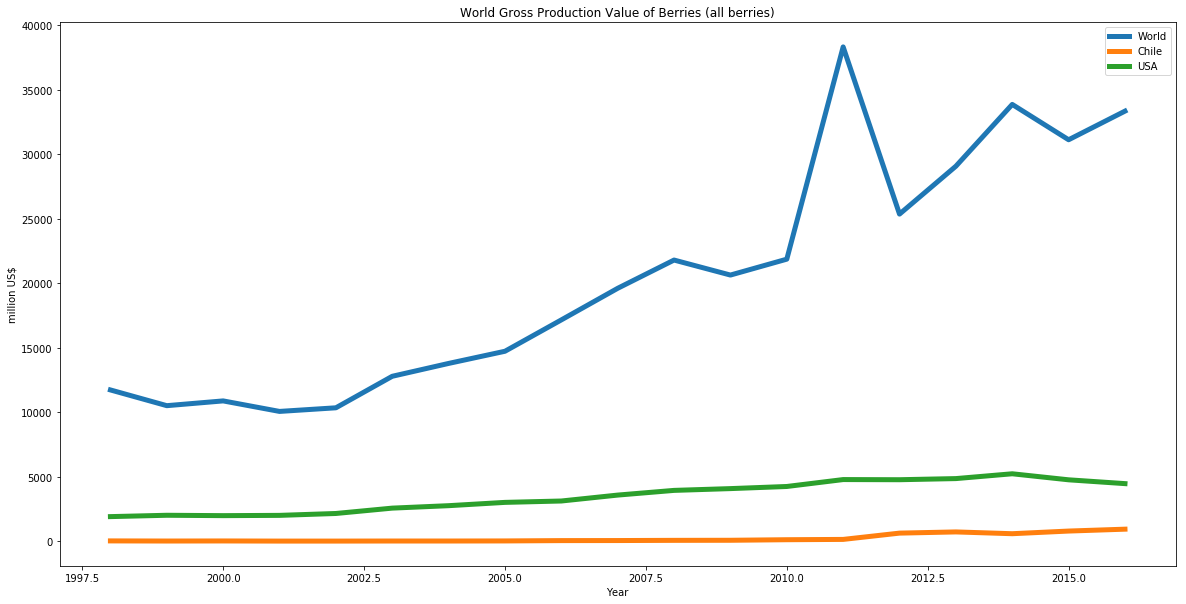

In [10]:
fig2, ax2 = plt.subplots()
ax2 = df2.groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='World')
ax2 = df2[df2.Area=='Chile'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='Chile')
ax2 = df2[df2.Area=='United States of America'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='USA')
ax2.set_ylabel("million US$")
plt.legend(loc='best')
plt.title('World Gross Production Value of Berries (all berries)')
plt.show()

In [11]:
# Get the country ranking ascending
df2.groupby('Area').sum().sort_values('Value',ascending=False).head(15)

,Year,Value
Area,,
United States of America,190665,66479.279286
"China, mainland",76266,62504.556906
China,76266,62504.556906
Japan,76266,36044.333372
Germany,162602,15050.932684
Turkey,76266,13815.729486
Republic of Korea,38133,11982.660256
Spain,116415,11687.081261
Russian Federation,152532,11113.440318


### Plot the World Gross Production Value (current million US$) (detailed)

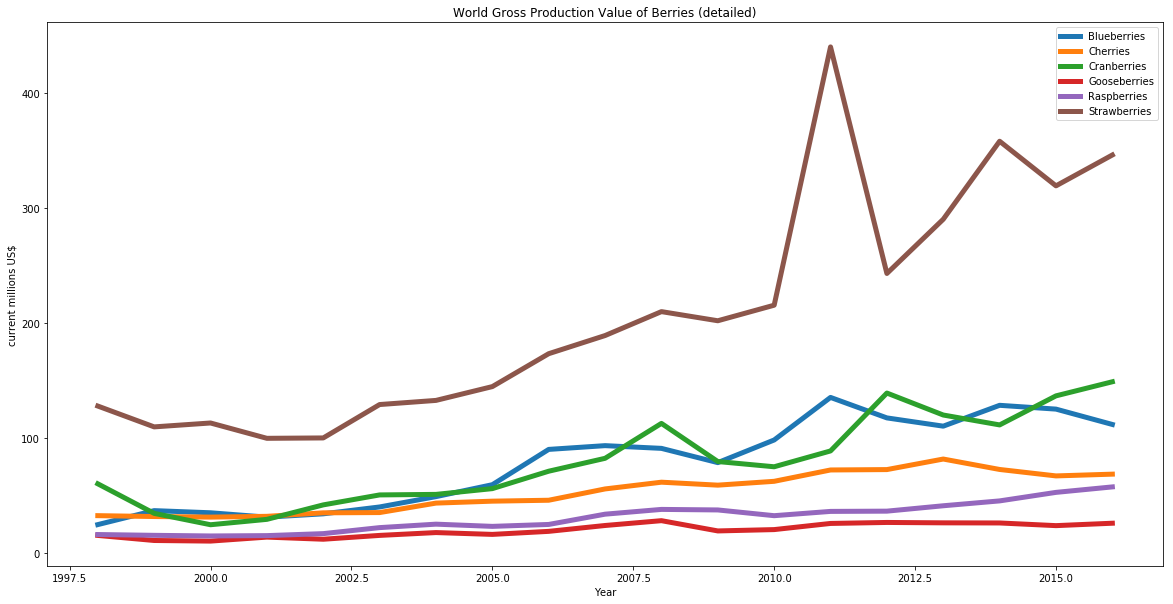

In [12]:
fig2, ax2 = plt.subplots()
for key, grp in df2.groupby(['Item']):
    ax2 = grp.groupby('Year')['Value'].mean().plot(label=key, figsize=(20,10), linewidth=5)

ax2.set_ylabel("current millions US$")
plt.legend(loc='best')
plt.title('World Gross Production Value of Berries (detailed)')
plt.show()

In [13]:
df2.groupby('Item').mean().sort_values('Value',ascending=False).head(5)

,Year,Value
Item,,
Strawberries,2007.042586,208.065813
Cranberries,2007.530612,82.977145
Blueberries,2007.596273,81.757627
Cherries,2007.083957,53.190722
Raspberries,2007.120863,31.044394


## Crops and livestock products - Berries ***Exports*** Quantity (tons)

**Quantity of food and agricultural exports**: **Export quantity** is defined by the IMTS as the physical quantity of domestic origin or manufactured products shipped out of the country. It includes re-exports. According to the FAO methodology, the quantity of food and agricultural exports included in the FAOSTAT database is expressed in terms of weight (tonnes) for all commodities except for live animals which are expressed in units (heads); poultry, rabbits, pigeons and other birds are expressed in thousand units. As a general rule, trade quantity refers to net weight, excluding any sort of container. 

**Quantity of food and agricultural imports**: Import quantity represents the physical quantity of the products imported for domestic consumption or processing shipped into a country. It includes re-imports. According to the FAO methodology, the quantity of food and agricultural imports included in the FAOSTAT database is expressed in terms of weight (tonnes) for all commodities except for live animals which are expressed in units (heads); poultry, rabbits, pigeons and other birds are expressed in thousand units. As a general rule, trade quantity refers to net weight, excluding any sort of container. It includes also food aid quantities, where relevant. 

In [14]:
# Read database FAO 
# All countries
# All years
# The data includes 'Export Quantity' and 'Export Valyue'
# for : (Blueberries, Cherries, Cranberries, Gooseberries, Strawberries)
df3 = pd.read_csv('FAOSTAT_exports.csv', sep= ',', header=0, index_col=0)

In [15]:
#Filter
df3 = df3[(df3.Year >= 1990)]

In [16]:
# Filter the 'Export Quantity' values
df3_quantity = df3[df3.Element == 'Export Quantity']
df3_quantity.head(5)

,Area,Element,Item,Year,Unit,Value
Domain,,,,,,
Crops and livestock products,Afghanistan,Export Quantity,Cherries,2014,tonnes,0.0
Crops and livestock products,Afghanistan,Export Quantity,Cherries,2015,tonnes,1.0
Crops and livestock products,Afghanistan,Export Quantity,Cherries,2016,tonnes,96.0
Crops and livestock products,Afghanistan,Export Quantity,Strawberries,2014,tonnes,0.0
Crops and livestock products,Afghanistan,Export Quantity,Strawberries,2016,tonnes,273.0


### Plot the World Export Quantity (top 5 countries)

**NOTA:** En la siguiente gráfica se suma la suma (SUM) debido a que se suman las **cantidades exportadas** de cada producto (fruta).
    Por ejemplo: Chile produce las 5 variedad de berries de la BD, mientras que Albania produce sólo 1 variedad

In [17]:
# Get the country ranking ascending
df3_quantity.groupby('Area').mean().sort_values('Value',ascending=False).head(20)

,Year,Value
Area,,
Spain,2002.727273,52624.589744
United States of America,2003.000000,42773.416667
Mexico,2002.538462,20543.073529
Chile,2002.657143,15854.978723
Turkey,2003.000000,13828.925926
Canada,2002.727273,11896.794643
Belgium,2008.000000,11228.000000
Italy,2003.000000,10763.485437
Netherlands,2003.000000,9006.138889


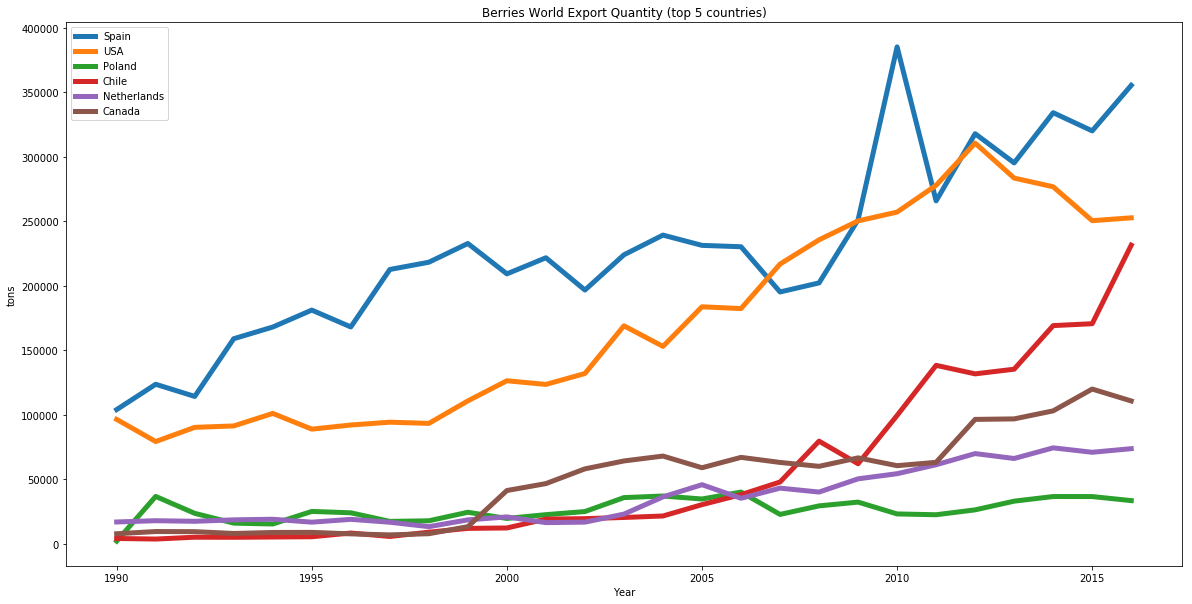

In [18]:
fig3, ax3 = plt.subplots()
#ax3 = df3_quantity.groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5,label='World')
ax3 = df3_quantity[df3_quantity.Area == 'Spain'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='Spain')
ax3 = df3_quantity[df3_quantity.Area == 'United States of America'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='USA')
ax3 = df3_quantity[df3_quantity.Area == 'Poland'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='Poland')
ax3 = df3_quantity[df3_quantity.Area == 'Chile'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='Chile')
ax3 = df3_quantity[df3_quantity.Area == 'Netherlands'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='Netherlands')
ax3 = df3_quantity[df3_quantity.Area == 'Canada'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='Canada')
ax3.set_ylabel("tons")
plt.legend(loc='best')
plt.title('Berries World Export Quantity (top 5 countries)')
plt.show()

### Plot the World Export Quantity (detailed berries for all countries) 

**NOTA:** En la siguiente gráfica se suma la suma (SUM) debido a que se suman las cantidades exportadas de cada país.

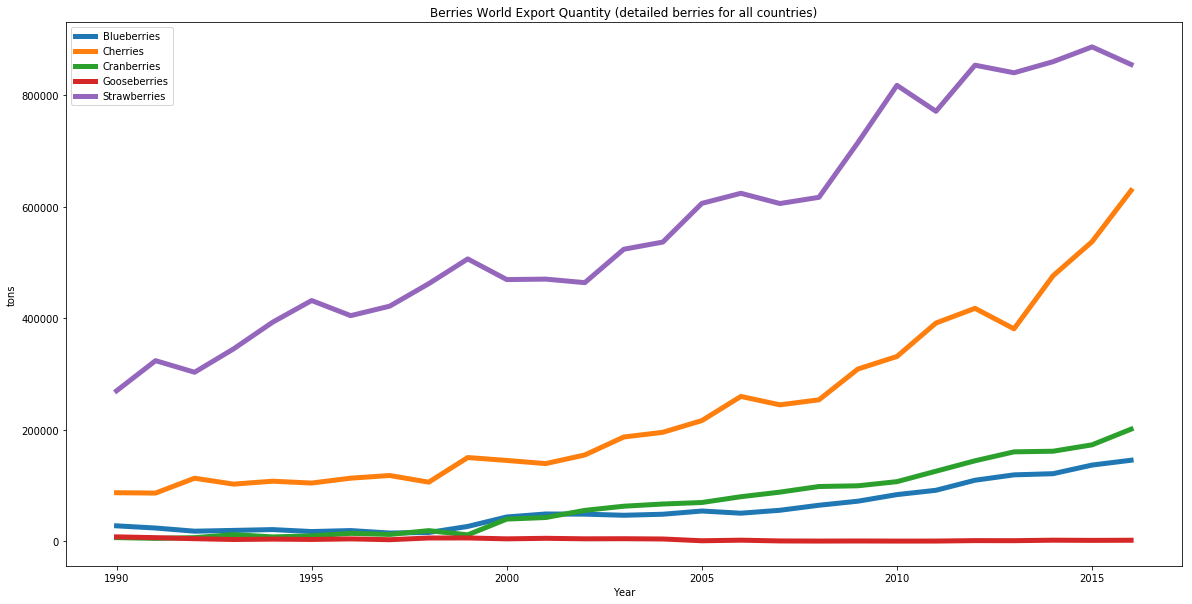

In [19]:
fig3, ax3 = plt.subplots()
for key, grp in df3_quantity.groupby(['Item']):
    ax3 = grp.groupby('Year')['Value'].sum().plot(label=key, figsize=(20,10), linewidth=5)

ax3.set_ylabel("tons")
plt.legend(loc='best')
plt.title('Berries World Export Quantity (detailed berries for all countries)')
plt.show()

## Crops and livestock products - Berries Exports Values (Top 10 countries)

**Value of agricultural exports**: Value of agricultural exports are expressed in thousand US dollars in the FAOSTAT database. Export values are reported as FOB  (free on board—that is, the value of the goods plus the value of the services performed to deliver the goods to the border of the exporting country). 

**Value of agricultural imports**: Value of agricultural imports are expressed in thousand US dollars in the FAOSTAT database. Import values are reported as CIF (cost insurance and freight—that is, the value of the goods, plus the value of the services performed to deliver goods to the border of the exporting country, plus the value of the services performed to deliver the good from the border of the exporting country to the border of the importing country). 

In [20]:
# Berries Exports Values (1000 millions US$) and Quantity (tons)

# Read database FAO 
# All countries
# All years
# Export Values (1000 million US$) and Quantity (tons)
# for : (Blueberries, Cherries, Cranberries, Gooseberries, Strawberries)
df3 = pd.read_csv('FAOSTAT_exports.csv', sep= ',', header=0, index_col=0)
# Filter Year
df3 = df3[df3.Year>1998]

In [21]:
# Filter the 'Export Value' datasets
df3_export_values = df3[df3.Element == 'Export Value']
df3_export_values.head(5)

,Area,Element,Item,Year,Unit,Value
Domain,,,,,,
Crops and livestock products,Afghanistan,Export Value,Cherries,2014,1000 US$,0.0
Crops and livestock products,Afghanistan,Export Value,Cherries,2015,1000 US$,2.0
Crops and livestock products,Afghanistan,Export Value,Cherries,2016,1000 US$,141.0
Crops and livestock products,Afghanistan,Export Value,Strawberries,2014,1000 US$,0.0
Crops and livestock products,Afghanistan,Export Value,Strawberries,2016,1000 US$,482.0


### Plot Berries Exports Values for top 10 countries

**NOTA:** En la siguiente gráfica se suma la suma (SUM) debido a que se suman los valores exportados de cada producto (fruta).
    Por ejemplo: Chile produce las 5 variedad de berries de la BD, mientras que Albania produce sólo 1 variedad

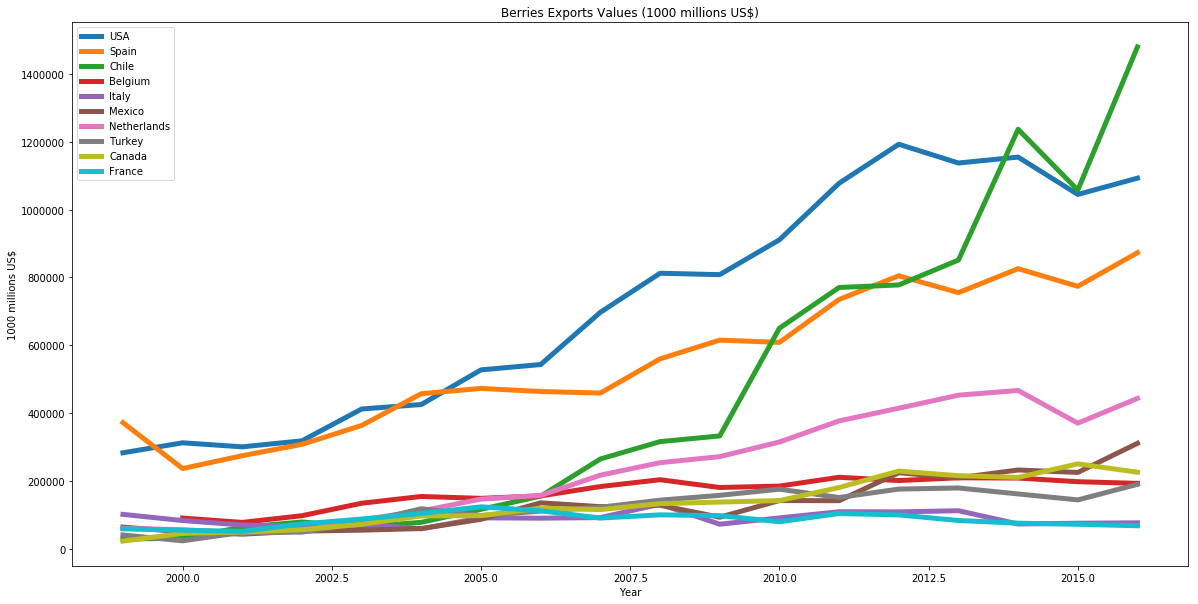

In [22]:
fig3, ax3 = plt.subplots()
#ax3 = df3_export_values.groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='world')
ax3 = df3_export_values[df3_export_values.Area == 'United States of America'].groupby('Year')['Value'].sum().plot(figsize=(20,10), linewidth=5, label='USA')
ax3 = df3_export_values[df3_export_values.Area == 'Spain'].groupby('Year')['Value'].sum().plot(linewidth=5, label='Spain')
ax3 = df3_export_values[df3_export_values.Area == 'Chile'].groupby('Year')['Value'].sum().plot( linewidth=5, label='Chile')
ax3 = df3_export_values[df3_export_values.Area == 'Belgium'].groupby('Year')['Value'].sum().plot( linewidth=5, label='Belgium')
ax3 = df3_export_values[df3_export_values.Area == 'Italy'].groupby('Year')['Value'].sum().plot(linewidth=5, label='Italy')
ax3 = df3_export_values[df3_export_values.Area == 'Mexico'].groupby('Year')['Value'].sum().plot(linewidth=5, label='Mexico')
ax3 = df3_export_values[df3_export_values.Area == 'Netherlands'].groupby('Year')['Value'].sum().plot( linewidth=5, label='Netherlands')
ax3 = df3_export_values[df3_export_values.Area == 'Turkey'].groupby('Year')['Value'].sum().plot( linewidth=5, label='Turkey')
ax3 = df3_export_values[df3_export_values.Area == 'Canada'].groupby('Year')['Value'].sum().plot( linewidth=5, label='Canada')
ax3 = df3_export_values[df3_export_values.Area == 'France'].groupby('Year')['Value'].sum().plot( linewidth=5, label='France')

ax3.set_ylabel("1000 millions US$")
plt.legend(loc='best')
plt.title('Berries Exports Values (1000 millions US$)')
plt.show()

In [23]:
# Get the country ranking ascending
df3_export_values.groupby('Area').mean().sort_values('Value',ascending=False).head(10)

,Year,Value
Area,,
United States of America,2007.500000,181284.250000
Chile,2007.173913,124721.522388
Spain,2007.241379,115821.697674
Netherlands,2007.500000,59765.291667
Mexico,2007.058824,47640.700000
Turkey,2007.500000,40211.296296
Belgium,2007.743902,35012.222222
Canada,2007.241379,28292.882353
"China, Hong Kong SAR",2007.500000,27459.277778


### Plot Berries Exports Exports Values (detailed)

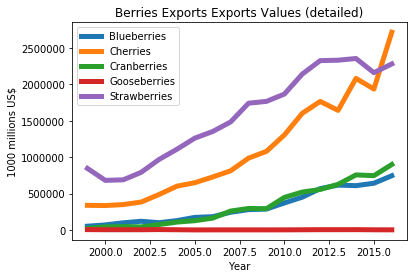

In [24]:
fig3, ax3 = plt.subplots()
for key, grp in df3_export_values.groupby(['Item']):
    ax3 = grp.groupby('Year')['Value'].sum().plot(label=key, linewidth=5)

ax3.set_ylabel("1000 millions US$")
plt.legend(loc='best')
plt.title('Berries Exports Exports Values (detailed)')
plt.show()

## Crops Production (tonnes)

### Data description

Crop statistics are recorded for 173 products, covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute & Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables and Melons. Data are expressed in terms of area harvested, production quantity and yield. The objective is to comprehensively cover production of all primary crops for all countries and regions in the world.

Cereals: Area and production data on cereals relate to crops harvested for dry grain only. Cereal crops harvested for hay or harvested green for food, feed or silage or used for grazing are therefore excluded. Area data relate to harvested area. Some countries report sown or cultivated area only; however, in these countries the sown or cultivated area does not differ significantly in normal years from the area actually harvested, either because practically the whole area sown is harvested or because the area surveys are conducted around the harvest period.

Vegetables, total (including melons): Data relate to vegetable crops grown mainly for human consumption. Crops such as cabbages, pumpkins and carrots, when explicitly cultivated for animal feed, are therefore excluded. Statistics on vegetables are not available in many countries, and the coverage of the reported data differs from country to country. In general, it appears that the data refer to crops grown in field and market gardens mainly for sale, thus excluding crops cultivated in kitchen gardens or small family gardens mainly for household consumption.

Fruit, total (excluding melons): Data refer to total production of fresh fruit, whether finally used for direct consumption for food or feed, or processed into different products: dry fruit, juice, jam, alcohol, etc. Generally, production data relate to plantation crops or orchard crops grown mainly for sale. Data on production from scattered trees used mainly for home consumption are not usually collected. Production from wild plants, particularly berries, which is of some importance in certain countries, is generally disregarded by national statistical services. Therefore, the data for the various fruits and berries are rather incomplete. Bananas and plantains: Figures on bananas refer, as far as possible, to all edible fruit-bearing species of the genus Musa except Musa paradisiaca, commonly known as plantain. Unfortunately, several countries make no distinction in their statistics between bananas and plantains and publish only overall estimates. When this occurs and there is some indication or assumption that the data reported refer mainly to bananas, the data are included. The production data on bananas and plantains reported by the various countries are also difficult to compare because a number of countries report in terms of bunches, which generally means that the stalk is included in the weight. Dates, plantains and total grapes are included in the “total fruit” aggregated figures, while olives are excluded.

Treenuts, aggregated: Production of nuts (including chestnuts) relates to nuts in the shell or in the husk. Statistics are very scanty and generally refer only to crops for sale. In addition to the kind of nuts shown separately, production data include all other treenuts mainly used as dessert or table nuts, such as pecan nuts, pili nuts, sapucaia nuts and macadamia nuts. Nuts mainly used for flavouring beverages are excluded as are masticatory and stimulant nuts and nuts used mainly for the extraction of oil or butter, including areca/betel nuts, cola nuts, illipe nuts, karate nuts, coconuts, tung nuts, oilpalm nuts etc.

### Statistical concepts and definitions

Areas refer to the area under cultivation. Area under cultivation means the area that corresponds to the total sown area, but after the harvest it excludes ruined areas (e.g. due to natural disasters). If the same land parcel is used twice in the same year, the area of this parcel can be counted twice. For tree crops, some countries provide data in terms of number of trees instead of in area. This number is then converted to an area estimate using typical planting density conversions.

***Production means the harvested production. Harvested production means production including on-holding losses and wastage, quantities consumed directly on the farm and marketed quantities, indicated in units of basic product weight***. Harvest year means the calendar year in which the harvest begins.

Yield means the harvested production per ha for the area under cultivation.

Seed quantity comprises all amounts of the commodity in question used during the reference period for reproductive purposes, such as seed or seedlings. Whenever official data are not available, seed figures can be estimated either as a percentage of production or by multiplying a seed rate (the average amount of seed needed per hectare planted) with the planted area of the particular crop of the subsequent year. Usually, the average seed rate in any given country does not vary greatly from year to year.

In [25]:
# Berries Crops Production (tons) 

# Read database FAO 
# All countries
# All years
# 
# for : (Blueberries, Cherries, Cranberries, Gooseberries, Strawberries)
df4_production = pd.read_csv('FAOSTAT_Crops_Production.csv', sep= ',', header=0, index_col=0)
#Filter years
df4_production = df4_production[df4_production.Year >= 1998]
df4_production.head(5)

,Area,Element,Item,Year,Unit,Value
Domain,,,,,,
Crops,Albania,Production,Cherries,1998,tonnes,4500.0
Crops,Albania,Production,Cherries,1999,tonnes,4500.0
Crops,Albania,Production,Cherries,2000,tonnes,5000.0
Crops,Albania,Production,Cherries,2001,tonnes,6800.0
Crops,Albania,Production,Cherries,2002,tonnes,6000.0


**NOTA:** En la siguiente gráfica se suma la suma (SUM) debido a que se suman las producciones de cada producto (fruta).
    Por ejemplo: Chile produce las 5 variedades de berries de la BD, mientras que Albania produce sólo 1 variedad

NameError: name 'FormatStrFormatter' is not defined

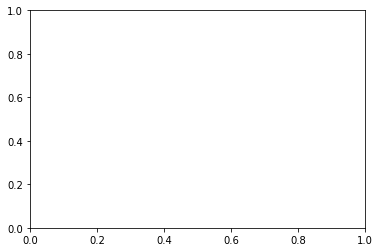

In [26]:
fig4, ax4 = plt.subplots()

ax4.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax4 = df4_production.groupby('Year')['Value'].sum().plot(linewidth=5, label='World')
ax4.set_ylabel("tonnes")

plt.legend(loc='best')
plt.title('Berries Production')
plt.savefig('berries_world_production.eps', format='eps', dpi=1000)    

In [ ]:
# Get the country ranking ascending using the last years of production
df4_production[df4_production.Year >= 2013].groupby('Area').mean().sort_values('Value',ascending=False).head(20)

# Production vs. Exports

Import libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

## Load FAO data

In [ ]:
df_production = pd.read_csv('FAOSTAT_Crops_Production.csv', sep= ',', header=0, index_col=0)
df_export = pd.read_csv('FAOSTAT_exports.csv', sep= ',', header=0, index_col=0)
df_export_quantity = df_export[df_export.Element == 'Export Quantity']

# Drop the duplicated China row
df_production=df_production[df_production.Area != 'China, mainland']
df_export_quantity=df_export_quantity[df_export_quantity.Area != 'China, mainland']

## Create the function to plot.

In [ ]:
def plot_prod_exp(filter_fruits, filter_year, one_year, number_of_datasets, font_size, show_table, print_graphic, df_p=fixed(df_production), df_x=fixed(df_export_quantity)):                
    
    #Filter years and delete some columns
    if(one_year): 
        df_p = df_p[df_p.Year == filter_year]
        df_x = df_x[df_x.Year == filter_year]
    else:
        df_p = df_p[df_p.Year >= filter_year]
        df_x = df_x[df_x.Year >= filter_year] 
    
    #Filter the fruits
    df_p = df_p[df_p.Item.isin(filter_fruits)]
    df_x = df_x[df_x.Item.isin(filter_fruits)]
    
    # Calculate the total production of all countries
    df_prod_total = df_p.groupby('Area').sum().sort_values('Value',ascending=False)
    df_prod_total.rename(columns={'Value': 'production'}, inplace=True)
    total_produced_all_countries = df_prod_total.production.sum()

    # Drop year columns
    df_p = df_p.drop('Year', 1)
    df_x = df_x.drop('Year', 1)
    
    # Replace somo long names of countries
    df_p = df_p.replace('United States of America', 'USA')
    df_p = df_p.replace('Russian Federation', 'Russia')
    df_p = df_p.replace('Iran (Islamic Republic of)', 'Iran')
    df_p = df_p.replace('Republic of Korea', 'Korea')
    df_p = df_p.replace('United Kingdom', 'UK')
    df_p = df_p.replace('Serbia and Montenegro', 'Serbia/Montenegro')
    
    
    # Get the country ranking ascending
    # The function SUM will be used because each country has more than one product, 
    # and we want to consider the sum of all products produced
    df_prod_ranking = df_p.groupby('Area').sum().sort_values('Value',ascending=False)
    df_prod_ranking.rename(columns={'Value': 'production'}, inplace=True)
    
    df_export_ranking = df_x.groupby('Area').sum().sort_values('Value',ascending=False)
    df_export_ranking.rename(columns={'Value': 'export'}, inplace=True)
                    
    # Merge both datasets on the country (Area) value
    merged = df_prod_ranking.merge(df_export_ranking, on='Area')
    
    # Calculate the ratio export / production
    merged['ratio'] = merged['export']/merged['production']
                    
    # Select and sort the top N production rows
    salida = merged.sort_values('production',ascending=False).head(number_of_datasets)
    
    # Calculate the production of topN countries 
    total_produced_by_top_countries = salida.production.sum()
    
    # Plot
    fig, ax = plt.subplots()
    ax.set_ylabel('tons')

    ax = salida.production.plot(style='b-', fontsize=font_size, figsize=(7, 5))
    ax = salida.export.plot(style='r-')
    
    ax.set_xticklabels(new_xlabels, rotation=90)
    
    
    ax.legend(['production','export','ratio'])
    ax.set_xticks(np.arange(0,number_of_datasets))
    ax.set_xlabel('country')
    ax.get_legend().set_bbox_to_anchor((0.05, 1))
    #plt.legend(loc='upper left')
    
    ax3 = ax.twinx()
    ax3 = salida.ratio.plot(style='g-', kind='bar', secondary_y=True, alpha=0.5)
    ax3.set_ylabel('ratio : export / production')
    ax3.set_ylim(0, 1)

    plt.legend(loc='upper right')
    plt.title('Berries Production versus Export')
    
    # Show table data
    if(show_table): print(salida)
    
    plt.tight_layout()

    # the plot gets saved to file
    if(print_graphic): plt.savefig('fig-berries-export-import.eps', format='eps', dpi=1000)
    
    return total_produced_by_top_countries/total_produced_all_countries
        
        

In [ ]:
# Define slide for years
yy = widgets.IntSlider(value=2016, min=1990, max=2016, step=1, description='Year:')

# Define the widget for the fruits
fruits = np.unique(df_production['Item'].values)
fru = widgets.SelectMultiple(options=fruits, value=['Blueberries'], description='Fruits:', disabled=False, rows=6)

# Define slide for countries
datasets = ds = widgets.IntSlider(value=20, min=1, max=50, step=1, description='Countries:')

interact(plot_prod_exp, filter_fruits=fru, filter_year=yy, one_year=True, number_of_datasets=ds, font_size=(10,15), show_table=False, print_graphic=False)


# World Production versus Price

In [ ]:
df_price = pd.read_csv('FAOSTAT_ProducerPricesAnnual.csv', sep= ',', header=0, index_col=0)
df_prod = pd.read_csv('FAOSTAT_Crops_Production.csv', sep= ',', header=0, index_col=0)

df_price = df_price[df_price.Year >= 1998]
df_prod = df_prod[df_prod.Year >= 1998]

fig1, ax1 = plt.subplots()
for key, grp in df_price.groupby(['Item']):
    ax1 = grp.groupby('Year')['Value'].mean().plot(label=key, linewidth=2)

ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.set_ylabel("US$/ton")
ax1.set_xlim(1997,2018)

plt.legend(frameon=True, title='Price', loc='upper left')

ax4 = ax.twinx()
ax4 = df_prod.groupby('Year')['Value'].sum().plot(linewidth=6, label='World',secondary_y=True, alpha=0.6, color='red', figsize=(7, 5))
ax4.set_ylabel("tonnes")
#plt.legend(loc='upper center')

red_patch = mpatches.Patch(color='red', label='world production')
plt.legend(handles=[red_patch], loc='upper center')

plt.title('Berries Producer (mean) Price versus Production')

plt.savefig('fig-berries-price-production.eps', format='eps', dpi=1000)